In [12]:
# import python package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [13]:
# import dataset

intake = pd.read_csv('aac_intakes.csv')
outcome = pd.read_csv('aac_outcomes.csv')
combined = pd.read_csv('aac_intakes_outcomes.csv')

In [14]:
# review the intake dataframe

#intake

In [15]:
#Review the outcome dataframe

#outcome

In [16]:
# Revie the combined dataframe

#combined

# Data Wrangling

In [17]:
# Check the info of combined dataframe

print(combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
age_upon_outcome              79672 non-null object
animal_id_outcome             79672 non-null object
date_of_birth                 79672 non-null object
outcome_subtype               36348 non-null object
outcome_type                  79662 non-null object
sex_upon_outcome              79671 non-null object
age_upon_outcome_(days)       79672 non-null int64
age_upon_outcome_(years)      79672 non-null float64
age_upon_outcome_age_group    79672 non-null object
outcome_datetime              79672 non-null object
outcome_month                 79672 non-null int64
outcome_year                  79672 non-null int64
outcome_monthyear             79672 non-null object
outcome_weekday               79672 non-null object
outcome_hour                  79672 non-null int64
outcome_number                79672 non-null float64
dob_year                      79672 non-null int64
dob_month 

In [18]:
#combined.isnull().sum()

In [19]:
# Check the missing value of sex_upon_outcome and sex_upon_intake

combined[pd.isnull(combined['sex_upon_intake'])]

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
6523,7 years,A667395,2006-11-17 00:00:00,NaN,Return to Owner,NaN,2555,7.0,"(5.0, 7.5]",2013-11-27 16:11:00,...,"(5.0, 7.5]",2013-11-17 13:15:00,11,2013,2013-11,Sunday,13,1.0,10 days 02:56:00.000000000,10.122222


In [6]:
# Check the missing value of sex_upon_outcome and sex_upon_intake

#combined[pd.isnull(combined['outcome_type'])]

In [20]:
# Drop the row with missing value in sex

combine = combined.dropna(subset=['sex_upon_intake', 'sex_upon_outcome','outcome_type'])

In [21]:
#replace outcome_subtype with 'Normal'

combine['outcome_subtype'] = combine['outcome_subtype'].replace(np.nan, 'Normal')

/Users/elisechen/anaconda3/envs/TestEnv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


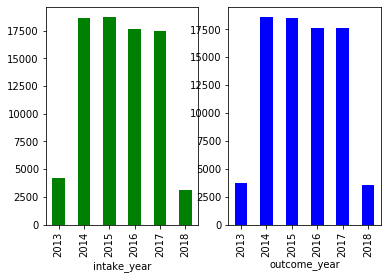

In [17]:
# Learn the timeline of the dataset

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
combine['animal_id_intake'].groupby(combine['intake_year']).count().plot(kind='bar',color='green',ax=ax1)
combine['animal_id_outcome'].groupby(combine['outcome_year']).count().plot(kind='bar',color='blue',ax=ax2)

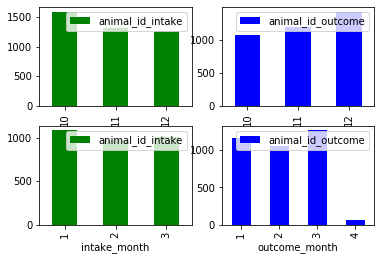

In [18]:
# Check the time of year 2013 and year 2014

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
combine.loc[(combine['intake_year'] == 2013),['animal_id_intake']].groupby(combine['intake_month']).count().plot(kind='bar',color='green',ax=ax1)
combine.loc[(combine['outcome_year'] == 2013),['animal_id_outcome']].groupby(combine['outcome_month']).count().plot(kind='bar',color='blue',ax=ax2)
combine.loc[(combine['intake_year'] == 2018),['animal_id_intake']].groupby(combine['intake_month']).count().plot(kind='bar',color='green',ax=ax3)
combine.loc[(combine['outcome_year'] == 2018),['animal_id_outcome']].groupby(combine['outcome_month']).count().plot(kind='bar',color='blue',ax=ax4)

In [22]:
# Drop values of October of 2013 and  April of 2014

combine = combine.loc[(combine['intake_monthyear'] != '2013-10') | (combine['outcome_monthyear'] != '2013-10') |(combine['outcome_monthyear'] != '2018-04')]

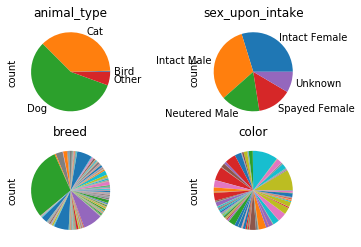

In [20]:
# Check the animal info

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)

combine['count'].groupby(combine['animal_type']).count().plot(kind='pie',title='animal_type', ax=ax1)
combine['count'].groupby(combine['breed']).count().plot(kind='pie',labels=None,title='breed', ax=ax3)
combine['count'].groupby(combine['color']).count().plot(kind='pie',labels=None,title='color', ax=ax4)
combine['count'].groupby(combine['sex_upon_intake']).count().plot(kind='pie',title='sex_upon_intake', ax=ax2)

In [24]:
#Learn the info of row of Unknown Sex

#combine.loc[combine['sex_upon_intake'] == 'Unknown',['age_upon_intake', 'animal_id', 'animal_type', 'breed', 'color','found_location', 'intake_condition','intake_type', 'name', 'sex_upon_intake','sex_upon_outcome','outcome_type']]

In [27]:
# Learn the info of unknown animal_type

#combine.loc[combine['animal_type'] == 'Other',['age_upon_intake', 'animal_id', 'animal_type', 'breed', 'color','found_location', 'intake_condition','intake_type', 'name', 'sex_upon_intake','sex_upon_outcome','outcome_type']]

In [23]:
# Drop the Unknown sex of Dog or Cat

combine = combine.loc[((combine['animal_type'] == 'Dog') & (combine['sex_upon_intake'] != 'Unknown')) | ((combine['animal_type'] == 'Cat') & (combine['sex_upon_intake'] != 'Unknown')) | (combine['animal_type'] == 'Bird') | (combine['animal_type'] == 'Other')]

In [24]:
#add time_in_shelter_range column

combine.loc[combine.time_in_shelter_days <= 7, 'time_in_shelter_range'] = 'a[0-1 week]' 
combine.loc[(combine.time_in_shelter_days > 7) & (combine.time_in_shelter_days <= 28), 'time_in_shelter_range'] = 'b(1 week-4 week]' 
combine.loc[(combine.time_in_shelter_days > 28) & (combine.time_in_shelter_days <= 90), 'time_in_shelter_range'] = 'c(4 week-3 month]' 
combine.loc[(combine.time_in_shelter_days > 90) & (combine.time_in_shelter_days <= 180), 'time_in_shelter_range'] = 'd(3 month- 6 month]' 
combine.loc[(combine.time_in_shelter_days > 180) & (combine.time_in_shelter_days <= 365), 'time_in_shelter_range'] = 'e(6 month- 1 year]' 
combine.loc[(combine.time_in_shelter_days > 365) & (combine.time_in_shelter_days <= 1825), 'time_in_shelter_range'] = 'f(1 year - 5 year]' 
combine.loc[combine.time_in_shelter_days > 1825, 'time_in_shelter_range'] = 'g(5 year and longer]' 


In [25]:
# change the age_upon_outcome_age_group

combine.loc[(combine.age_upon_outcome_age_group == '(-0.025, 2.5]'), 'age_upon_outcome_age_group'] = 'a(-0.025, 2.5]' 
combine.loc[(combine.age_upon_outcome_age_group == '(2.5, 5.0]'), 'age_upon_outcome_age_group'] = 'b(2.5, 5.0]' 
combine.loc[(combine.age_upon_outcome_age_group == '(5.0, 7.5]'), 'age_upon_outcome_age_group'] = 'c(5.0, 7.5]' 
combine.loc[(combine.age_upon_outcome_age_group == '(7.5, 10.0]'), 'age_upon_outcome_age_group'] = 'd(7.5, 10.0]' 
combine.loc[(combine.age_upon_outcome_age_group == '(10.0, 12.5]'), 'age_upon_outcome_age_group'] = 'e(10.0, 12.5]' 
combine.loc[(combine.age_upon_outcome_age_group == '(12.5, 15.0]'), 'age_upon_outcome_age_group'] = 'f(12.5, 15.0]' 
combine.loc[(combine.age_upon_outcome_age_group == '(15.0, 17.5]'), 'age_upon_outcome_age_group'] = 'g(15.0, 17.5]' 
combine.loc[(combine.age_upon_outcome_age_group == '(17.5, 20.0]'), 'age_upon_outcome_age_group'] = 'h(17.5, 20.0]' 
combine.loc[(combine.age_upon_outcome_age_group == '(20.0, 22.5]'), 'age_upon_outcome_age_group'] = 'i(20.0, 22.5]' 
combine.loc[(combine.age_upon_outcome_age_group == '(22.5, 25.0]'), 'age_upon_outcome_age_group'] = 'j(22.5, 25.0]' 


In [26]:
# change the age_upon_intake_age_group

combine.loc[(combine.age_upon_intake_age_group == '(-0.025, 2.5]'), 'age_upon_intake_age_group'] = 'a(-0.025, 2.5]' 
combine.loc[(combine.age_upon_intake_age_group == '(2.5, 5.0]'), 'age_upon_intake_age_group'] = 'b(2.5, 5.0]' 
combine.loc[(combine.age_upon_intake_age_group == '(5.0, 7.5]'), 'age_upon_intake_age_group'] = 'c(5.0, 7.5]' 
combine.loc[(combine.age_upon_intake_age_group == '(7.5, 10.0]'), 'age_upon_intake_age_group'] = 'd(7.5, 10.0]' 
combine.loc[(combine.age_upon_intake_age_group == '(10.0, 12.5]'), 'age_upon_intake_age_group'] = 'e(10.0, 12.5]' 
combine.loc[(combine.age_upon_intake_age_group == '(12.5, 15.0]'), 'age_upon_intake_age_group'] = 'f(12.5, 15.0]' 
combine.loc[(combine.age_upon_intake_age_group == '(15.0, 17.5]'), 'age_upon_intake_age_group'] = 'g(15.0, 17.5]' 
combine.loc[(combine.age_upon_intake_age_group == '(17.5, 20.0]'), 'age_upon_intake_age_group'] = 'h(17.5, 20.0]' 
combine.loc[(combine.age_upon_intake_age_group == '(20.0, 22.5]'), 'age_upon_intake_age_group'] = 'i(20.0, 22.5]' 
combine.loc[(combine.age_upon_intake_age_group == '(22.5, 25.0]'), 'age_upon_intake_age_group'] = 'j(22.5, 25.0]' 

In [31]:
# add if neutered columns

combine.loc[(combine.sex_upon_intake == 'Intact Female') & (combine.sex_upon_outcome == 'Neutered Female'), 'if_neutered'] = 'Yes' 
combine.loc[(combine.sex_upon_intake == 'Intact Male') & (combine.sex_upon_outcome == 'Neutered Male'), 'if_neutered'] = 'Yes'
combine['if_neutered']=combine['if_neutered'].replace(np.nan,'No')

In [28]:
# convert data column to date type

#combine.outcome_year.astype(object)

In [29]:
#combine

In [30]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76842 entries, 0 to 79671
Data columns (total 43 columns):
age_upon_outcome              76842 non-null object
animal_id_outcome             76842 non-null object
date_of_birth                 76842 non-null object
outcome_subtype               76842 non-null object
outcome_type                  76842 non-null object
sex_upon_outcome              76842 non-null object
age_upon_outcome_(days)       76842 non-null int64
age_upon_outcome_(years)      76842 non-null float64
age_upon_outcome_age_group    76842 non-null object
outcome_datetime              76842 non-null object
outcome_month                 76842 non-null int64
outcome_year                  76842 non-null int64
outcome_monthyear             76842 non-null object
outcome_weekday               76842 non-null object
outcome_hour                  76842 non-null int64
outcome_number                76842 non-null float64
dob_year                      76842 non-null int64
dob_month 

# Story telling

# What is the factor affects outcome_type?

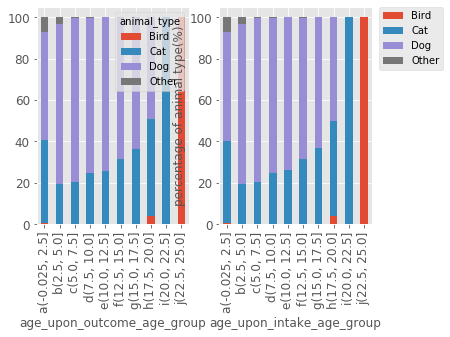

In [31]:
# Discover the animal type distribution among each age group both income and outcome first

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
pivot_age_type_len = combine.pivot_table(columns='animal_type', index='age_upon_outcome_age_group',values='count', aggfunc=len, margins=True,fill_value=0)
pivot_age_type_percent= pivot_age_type_len.div(pivot_age_type_len.iloc[:,-1], axis=0 )*100
pivot_age_type_percent.iloc[0:-1,0:-1].plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax1)
ax2.set_ylabel('percentage of animal type(%)')

pivot_age_type_in_len = combine.pivot_table(columns='animal_type', index='age_upon_intake_age_group',values='count', aggfunc=len, margins=True,fill_value=0)
pivot_age_type_in_percent= pivot_age_type_in_len.div(pivot_age_type_in_len.iloc[:,-1], axis=0 )*100
pivot_age_type_in_percent.iloc[0:-1,0:-1].plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax2)
ax2.set_ylabel('percentage of animal type(%)')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

1. The patten of animal type distribution of intake and outcome are very similar, because more animals stays in shelter for very short time. 
2. The percentage of cat is highest for youngest age group, and there is signficant drop for next group. Besides, the cat percentage grows slowly as age is older. There is special reason for the more baby cat. The reason maybe that it is easiler for cat to breed outside, but harder for them to survive through 2 years. 
3. There is only 2 age groups of bird, 20-22.5 and 22.5-25. Maybe they have different rule to determine brid age. 
4. There is no dog older than 20 years.
5. All animals older then 22.5 are birds, and they are all transfered. There maybe special facility to accept all birds. 

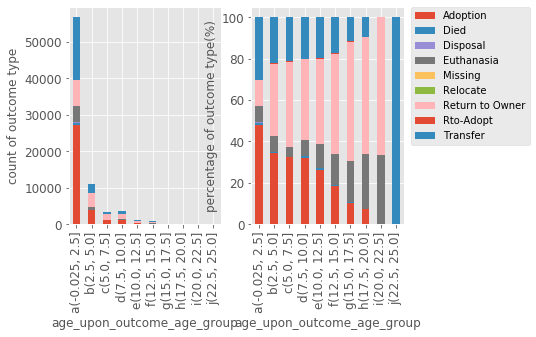

In [32]:
# plot the relationship of animal age with outcome type

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
pivot_age_outcome_count = combine.pivot_table(columns='outcome_type', index=['age_upon_outcome_age_group'],values='count',aggfunc=len)
pivot_age_outcome_count.plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax1,legend=None)
ax1.set_ylabel('count of outcome type')

pivot_age_outcome_len = combine.pivot_table(columns='outcome_type', index=['age_upon_outcome_age_group'],values='count', aggfunc=len, margins=True,fill_value=0)
pivot_age_outcome_percent= pivot_age_outcome_len.div(pivot_age_outcome_len.iloc[:,-1], axis=0 )*100
pivot_age_outcome_percent.iloc[0:-1,0:-1].plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax2)
ax2.set_ylabel('percentage of outcome type(%)')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

1. Most animals are younger than 2.5 years old. The older the age group, the less the animals. Oonly very few animals are older than 7.5 years. It is harder for older aniaml to survive outside. 
2. Most people prefer to adopt younger animals. Also, younger animals are more likely to be transferred, which is similar as adoption. Usually, they are transfer to barn or other facilities. The percentage of adoption and transfer drops as age groups is older. 
3. Older animals are more lokely to suffer enthanasia. For animals older than 20 years, the only way is enthanasia, if the owneer cannot be found. 
4. Animals were more likely to be returned to owner. Younger animals are too young to have owners. 

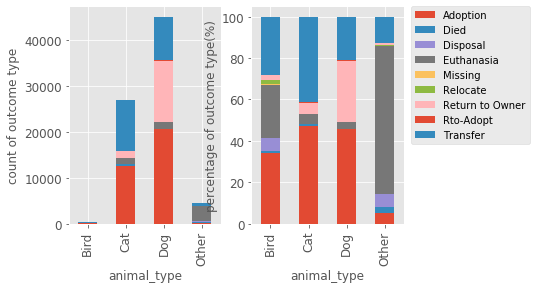

In [33]:
# plot the relationship of animal type with outcome type

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
pivot_type_outcome_count = combine.pivot_table(columns='outcome_type', index=['animal_type'],values='count',aggfunc=len)
pivot_type_outcome_count.plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax1,legend=None)
ax1.set_ylabel('count of outcome type')

pivot_type_outcome_len = combine.pivot_table(columns='outcome_type', index=['animal_type'],values='count', aggfunc=len, margins=True,fill_value=0)
pivot_type_outcome_percent= pivot_type_outcome_len.div(pivot_type_outcome_len.iloc[:,-1], axis=0 )*100
pivot_type_outcome_percent.iloc[0:-1,0:-1].plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax2)
ax2.set_ylabel('percentage of outcome type(%)')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

1. Most animals are cats and dogs. 
2. Dogs are much more likely to be returned to owner than cats. 
3. Most other animals are conducted euthanasia. 
4. Some of birds and other animals are disposal, while no cat and dog are disposal. These animals must be wild animals and keep ablility to survive outside. 

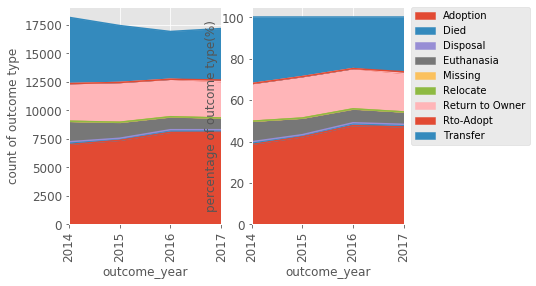

In [34]:
# plot the outcome type change of different

plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
combine_2014_2017_outcome = combine.loc[(combine.outcome_year == 2014) | (combine.outcome_year == 2015) | (combine.outcome_year == 2016) | (combine.outcome_year == 2017)]
pivot_year_outcome_count = combine_2014_2017_outcome.pivot_table(columns='outcome_type', index='outcome_year',values='count',aggfunc='count')
pivot_year_outcome_count.plot(kind='area', stacked=True, rot=90, fontsize=12,ax=ax1,legend=None)
ax1.set_ylabel('count of outcome type')

pivot_year_outcome_len = combine_2014_2017_outcome.pivot_table(columns='outcome_type', index='outcome_year',values='count', aggfunc=len, margins=True,fill_value=0)
pivot_year_outcome_percent= pivot_year_outcome_len.div(pivot_year_outcome_len.iloc[:,-1], axis=0 )*100
pivot_year_outcome_percent.iloc[0:-1,0:-1].plot(kind='area', stacked=True, rot=90, fontsize=12,ax=ax2)
ax2.set_ylabel('percentage of outcome type(%)')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

1. There is no significat change for total animal number over 4 years. 
2. 5% more animals were adopted during 2016 to 2017, while 5% less animals were transferred. 

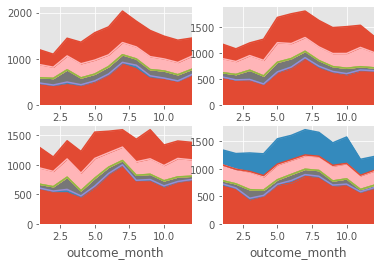

In [35]:
# The outcome type of different month

plt.style.use('ggplot')
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
combine.loc[(combine.outcome_year == 2014)].pivot_table(columns='outcome_type',index='outcome_month',values='count',aggfunc=len).plot(kind='area',stacked=True,ax=ax1,legend=None)
combine.loc[(combine.outcome_year == 2015)].pivot_table(columns='outcome_type',index='outcome_month',values='count',aggfunc=len).plot(kind='area',stacked=True,ax=ax2,legend=None)
combine.loc[(combine.outcome_year == 2016)].pivot_table(columns='outcome_type',index='outcome_month',values='count',aggfunc=len).plot(kind='area',stacked=True,ax=ax3,legend=None)
combine.loc[(combine.outcome_year == 2017)].pivot_table(columns='outcome_type',index='outcome_month',values='count',aggfunc=len).plot(kind='area',stacked=True,ax=ax4,legend=None)

1. There are certain panel for animal change each year. The animal adoption number was the smallest on April, and it gows to reach a peak on July. 
2. Only adoption number has obvious change during different month. 

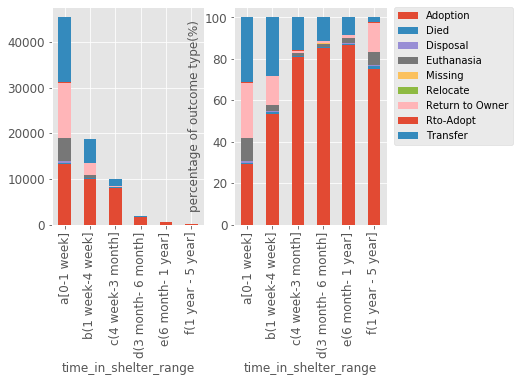

In [36]:
# Relationship of time in shelter with outcome_type

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
pivot_outcome_staytime = combine.pivot_table(columns='outcome_type', index=['time_in_shelter_range'],values='count', aggfunc='count')
pivot_outcome_staytime.plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax1,legend=None)

pivot_outcome_staytime_len = combine.pivot_table(columns='outcome_type', index=['time_in_shelter_range'],values='count', aggfunc=len, margins=True,fill_value=0)
pivot_outcome_staytime_percent= pivot_outcome_staytime_len.div(pivot_outcome_staytime_len.iloc[:,-1], axis=0 )*100
pivot_outcome_staytime_percent.iloc[0:-1,0:-1].plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax2)
ax2.set_ylabel('percentage of outcome type(%)')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

1. Most animals stay in shelter for less than 1 week.
2. Owner find their pet either very soon (within 1 week) or after long time(1-5 year).

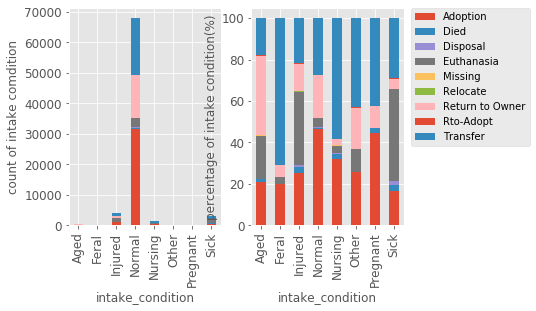

In [37]:
#Relationship of intake condition with outcome type

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
pivot_intake_condition_outcome_count = combine.pivot_table(index='intake_condition', columns=['outcome_type'],values='count', aggfunc='count')
pivot_intake_condition_outcome_count.plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax1,legend=None)
ax1.set_ylabel('count of intake comdition')
pivot_intake_condition_outcome_len = combine.pivot_table(index='intake_condition', columns=['outcome_type'],values='count', aggfunc=len, margins=True,fill_value=0)
pivot_intake_condition_outcome_percent= pivot_intake_condition_outcome_len.div(pivot_intake_condition_outcome_len.iloc[:,-1], axis=0 )*100
pivot_intake_condition_outcome_percent.iloc[0:-1,0:-1].plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax2)
ax2.set_ylabel('percentage of intake condition(%)')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

1. Most animals are normal when they are take in.
2. Aged,Injured and sick animals are more likely to process euthanasia than other animals. 
3. Most feral animals were transferred. There should be more professional facility for them. 

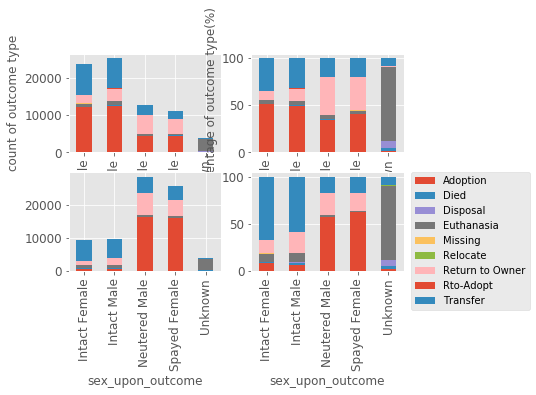

In [38]:
# relationship of sex_upon_outcome and outcome type

plt.style.use('ggplot')
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)

pivot_sex_type_count = combine.pivot_table(columns='outcome_type', index=['sex_upon_intake'],values='count',aggfunc=len)
pivot_sex_type_count.plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax1,legend=None)
ax1.set_ylabel('count of outcome type')

pivot_sex_type_len = combine.pivot_table(columns='outcome_type', index='sex_upon_intake',values='count', aggfunc=len, margins=True,fill_value=0)
pivot_sex_type_percent= pivot_sex_type_len.div(pivot_sex_type_len.iloc[:,-1], axis=0 )*100
pivot_sex_type_percent.iloc[0:-1,0:-1].plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax2,legend=None)
ax2.set_ylabel('percentage of outcome type(%)')
ax2.set_xlabel('sex_upon_intake')

pivot_sex_type_in_count = combine.pivot_table(columns='outcome_type', index='sex_upon_outcome',values='count',aggfunc=len)
pivot_sex_type_in_count.plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax3,legend=None)
ax1.set_ylabel('count of outcome type')

pivot_sex_type_in_len = combine.pivot_table(columns='outcome_type', index='sex_upon_outcome',values='count', aggfunc=len, margins=True,fill_value=0)
pivot_sex_type_in_percent= pivot_sex_type_in_len.div(pivot_sex_type_in_len.iloc[:,-1], axis=0 )*100
pivot_sex_type_in_percent.iloc[0:-1,0:-1].plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax4)
ax4.set_xlabel('sex_upon_outcome')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

1. Most animals were neutered by shelter before adoption. 
2. Only around half of animals were neutered if they were trasferred. 
3. There is no difference with male and female. 

Text(0, 0.5, 'percentage(%)')

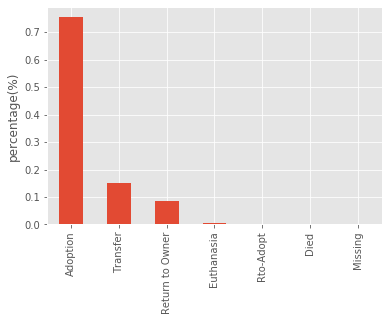

In [33]:
# What is the outcome type for neutered animals

plt.style.use('ggplot')

neutered = combine.loc[combine.if_neutered == 'Yes']
neutered = neutered['outcome_type'].value_counts().to_frame()
neutered['percent']=neutered['outcome_type']/neutered['outcome_type'].sum()
ax=neutered['percent'].plot(kind='bar')
ax.set_ylabel('percentage(%)')

Animals were neutered mainly for adoption.

# What is the factors determines animals take in?

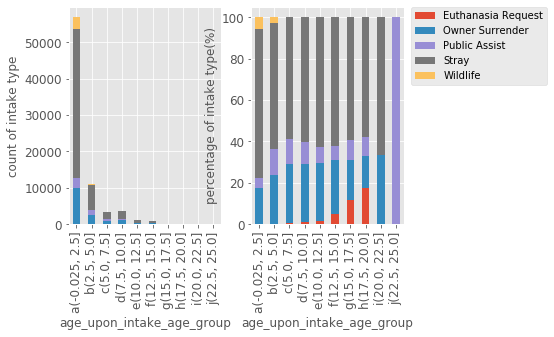

In [41]:
# plot the relationship of animal age with outcome type

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
pivot_age_intake_count = combine.pivot_table(columns='intake_type', index=['age_upon_intake_age_group'],values='count',aggfunc=len)
pivot_age_intake_count.plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax1,legend=None)
ax1.set_ylabel('count of intake type')

pivot_age_intake_len = combine.pivot_table(columns='intake_type', index=['age_upon_intake_age_group'],values='count', aggfunc=len, margins=True,fill_value=0)
pivot_age_intake_percent= pivot_age_intake_len.div(pivot_age_intake_len.iloc[:,-1], axis=0 )*100
pivot_age_intake_percent.iloc[0:-1,0:-1].plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax2)
ax2.set_ylabel('percentage of intake type(%)')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

1. Most animals were taken in at very young age.
2. Most animals were lost on the street. 
3. Some old animals were sent for euthanasia request. 
4. All animals, which we have know they are birds, are received from pubilc assist. 

# Will intake type determine the life of animals?

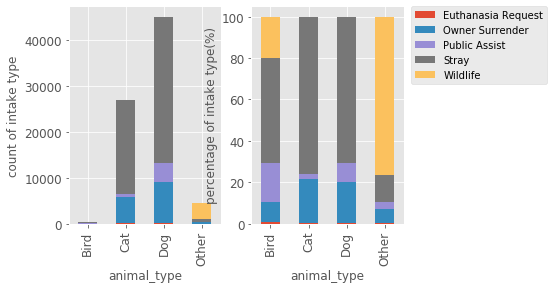

In [42]:
# plot the relationship of animal type with intake type

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
pivot_type_intake_count = combine.pivot_table(columns='intake_type', index=['animal_type'],values='count',aggfunc=len)
pivot_type_intake_count.plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax1,legend=None)
ax1.set_ylabel('count of intake type')

pivot_type_intake_len = combine.pivot_table(columns='intake_type', index=['animal_type'],values='count', aggfunc=len, margins=True,fill_value=0)
pivot_type_intake_percent= pivot_type_intake_len.div(pivot_type_intake_len.iloc[:,-1], axis=0 )*100
pivot_type_intake_percent.iloc[0:-1,0:-1].plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax2)
ax2.set_ylabel('percentage of intake type(%)')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

1. There is more public asssit for dogs and birds than cats
2. There are most of dogs in the selther. 
3. Other animals are mostly wildlife animal. 
4. People request euthanasia request for all kinds of animals. 

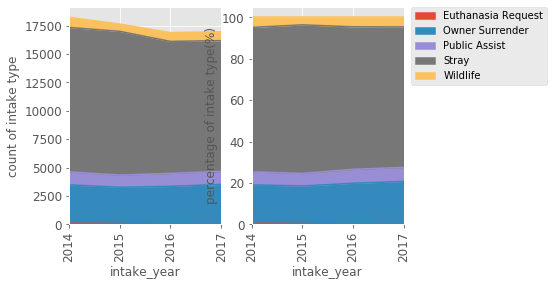

In [43]:
# plot the intake type change of different

plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
combine_2014_2017_intake = combine.loc[(combine.intake_year == 2014) | (combine.intake_year == 2015) | (combine.intake_year == 2016) | (combine.intake_year == 2017)]
pivot_year_intake_count = combine_2014_2017_intake.pivot_table(columns='intake_type', index='intake_year',values='count',aggfunc='count')
pivot_year_intake_count.plot(kind='area', stacked=True, rot=90, fontsize=12,ax=ax1,legend=None)
ax1.set_ylabel('count of intake type')

pivot_year_intake_len = combine_2014_2017_intake.pivot_table(columns='intake_type', index='intake_year',values='count', aggfunc=len, margins=True,fill_value=0)
pivot_year_intake_percent= pivot_year_intake_len.div(pivot_year_intake_len.iloc[:,-1], axis=0 )*100
pivot_year_intake_percent.iloc[0:-1,0:-1].plot(kind='area', stacked=True, rot=90, fontsize=12,ax=ax2)
ax2.set_ylabel('percentage of intake type(%)')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

There is a little drop for animal total amount takein. The drop comes from stray animals. Less animals got lost for 2016-2017 year.

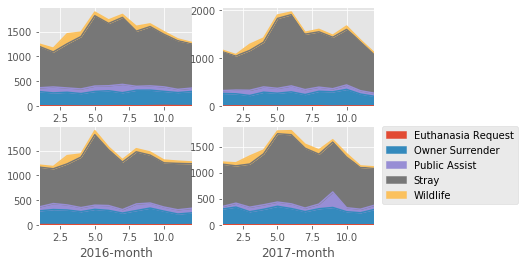

In [44]:
# The outcome type of different month

plt.style.use('ggplot')
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
combine.loc[(combine.intake_year == 2014)].pivot_table(columns='intake_type',index='intake_month',values='count',aggfunc=len).plot(kind='area',stacked=True,ax=ax1,legend=None)
ax1.set_xlabel('2014-month')
combine.loc[(combine.intake_year == 2015)].pivot_table(columns='intake_type',index='intake_month',values='count',aggfunc=len).plot(kind='area',stacked=True,ax=ax2,legend=None)
ax2.set_xlabel('2015-month')
combine.loc[(combine.intake_year == 2016)].pivot_table(columns='intake_type',index='intake_month',values='count',aggfunc=len).plot(kind='area',stacked=True,ax=ax3,legend=None)
ax3.set_xlabel('2016-month')
combine.loc[(combine.intake_year == 2017)].pivot_table(columns='intake_type',index='intake_month',values='count',aggfunc=len).plot(kind='area',stacked=True,ax=ax4,legend=None)
ax4.set_xlabel('2017-month')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

1. Most animals were found on May to September. May to June is the peak. Maybe animals went out for food after wminter at that time. 
2. There is a peak for pubilc assit on September-2107. Maybe there is some public event on that time. 

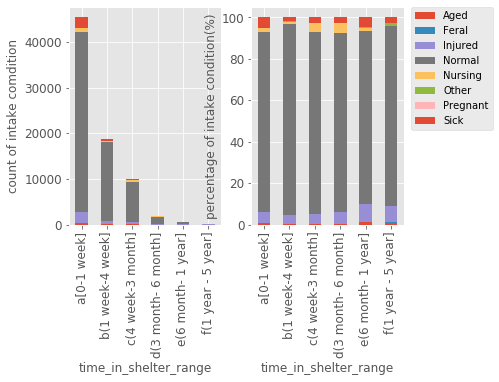

In [45]:
#Relationship of intake condition with time spend in shelter

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
pivot_intake_staytime = combine.pivot_table(columns='intake_condition', index=['time_in_shelter_range'],values='count', aggfunc='count')
pivot_intake_staytime.plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax1,legend=None)
ax1.set_ylabel('count of intake comdition')
pivot_intake_staytime_len = combine.pivot_table(columns='intake_condition', index=['time_in_shelter_range'],values='count', aggfunc=len, margins=True,fill_value=0)
pivot_intake_staytime_percent= pivot_intake_staytime_len.div(pivot_intake_staytime_len.iloc[:,-1], axis=0 )*100
pivot_intake_staytime_percent.iloc[0:-1,0:-1].plot(kind='bar', stacked=True, rot=90, fontsize=12,ax=ax2)
ax2.set_ylabel('percentage of intake condition(%)')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

There is no effect of intake comdition on how long animals stay in shelter 

# What kind of animals will be conducted euthanasia?

In [46]:
# select animals of euthanasia

combine_ea = combine.loc[(combine.outcome_type == 'Euthanasia')]


Text(0, 0.5, 'percentage(%)')

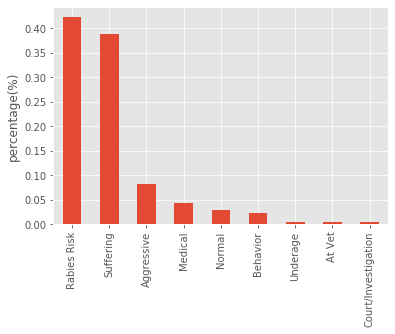

In [169]:
#the subtype of animals of euthanasia

subtype_ea = combine_ea['outcome_subtype'].value_counts().to_frame()
subtype_ea['percent']= subtype_ea['outcome_subtype']/subtype_ea['outcome_subtype'].sum()
ax=subtype_ea['percent'].plot(kind='bar')
ax.set_ylabel('percentage(%)')

The first reason for euthanasia is they are suffer rabies risk and suffering. 

Text(0, 0.5, 'percentage(%)')

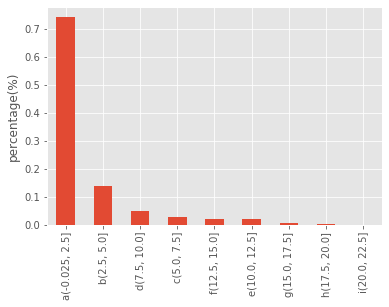

In [170]:
#animals of euthanasia in different intake_age group

plt.style.use('ggplot')

intake_age_ea = combine_ea['age_upon_intake_age_group'].value_counts().to_frame()
intake_age_ea['percent']= intake_age_ea['age_upon_intake_age_group']/intake_age_ea['age_upon_intake_age_group'].sum()
ax=intake_age_ea['percent'].plot(kind='bar')
ax.set_ylabel('percentage(%)')

Text(0, 0.5, 'percentage(%)')

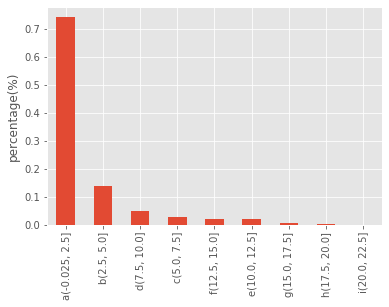

In [173]:
#animals of euthanasia in different outcome_age group

plt.style.use('ggplot')

outcome_age_ea = combine_ea['age_upon_outcome_age_group'].value_counts().to_frame()
outcome_age_ea['percent']= outcome_age_ea['age_upon_outcome_age_group']/outcome_age_ea['age_upon_outcome_age_group'].sum()
ax=intake_age_ea['percent'].plot(kind='bar')
ax.set_ylabel('percentage(%)')

Most animals that were conducted euthanasia are young. 

Text(0, 0.5, 'percentage(%)')

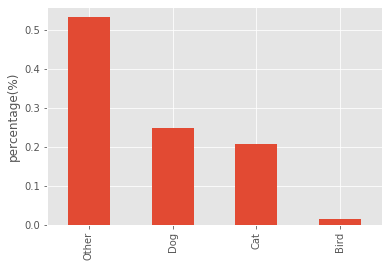

In [175]:
#animals of euthanasia in animal_type

plt.style.use('ggplot')

type_ea = combine_ea['animal_type'].value_counts().to_frame()
type_ea['percent']= type_ea['animal_type']/type_ea['animal_type'].sum()
ax=type_ea['percent'].plot(kind='bar')
ax.set_ylabel('percentage(%)')

Most animals that were conducted euthanasia are other type.

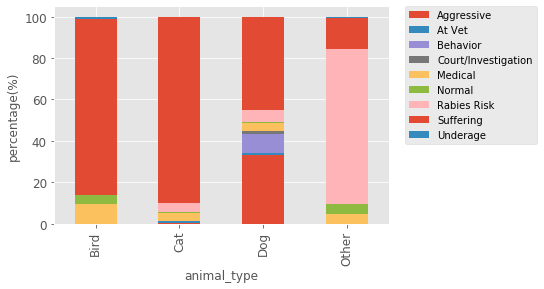

In [51]:
#compare animal_type with outcome_subtype

plt.style.use('ggplot')

pivot_type_subtype_len = combine_ea.pivot_table(index='animal_type', columns=['outcome_subtype'],values='count', aggfunc=len, margins=True,fill_value=0)
pivot_type_subtype_percent= pivot_type_subtype_len.div(pivot_type_subtype_len.iloc[:,-1], axis=0 )*100
ax=pivot_type_subtype_percent.iloc[0:-1,0:-1].plot(kind='bar',stacked=True, rot=90, fontsize=12)
ax.set_ylabel('percentage(%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

1. Cat and bird are major aggressive animal type.
2. Suffering is an important factor of euthanasia for dog, while it doesn't apply for other animals.
3. Other animals, which are mostly wild animals, is affected with rabies much more eaiser than cat and dog. 
4. Dog might be conducted euthanasia because of behavior issue, which doesn't apply to other animal types. 

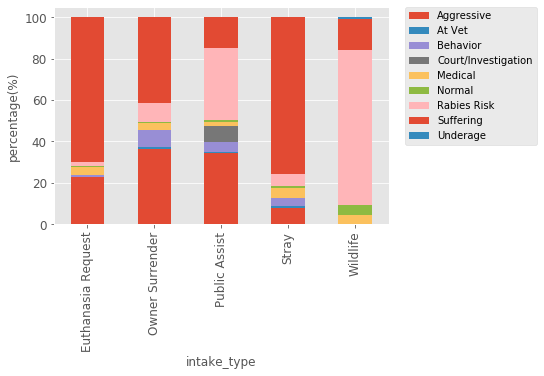

In [52]:
#compare intake_type with outcome_subtype

plt.style.use('ggplot')

pivot_condition_subtype_len = combine_ea.pivot_table(index='intake_type', columns=['outcome_subtype'],values='count', aggfunc=len, margins=True,fill_value=0)
pivot_condition_subtype_percent= pivot_condition_subtype_len.div(pivot_condition_subtype_len.iloc[:,-1], axis=0 )*100
ax=pivot_condition_subtype_percent.iloc[0:-1,0:-1].plot(kind='bar',stacked=True, rot=90, fontsize=12)
ax.set_ylabel('percentage(%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

1. Most animals were requested euthanasia are due to aggressive. Others are because of suffering. 

# Color and Breed of animals

In [133]:
#Group animals according to animal types. 

Dog = combine.loc[(combine.animal_type == 'Dog'),['breed','color','count']]
Cat = combine.loc[(combine.animal_type == 'Cat'),['breed','color','count']]
Bird = combine.loc[(combine.animal_type == 'Bird'),['breed','color','count']]
Other = combine.loc[(combine.animal_type == 'Other'),['breed','color','count']]

In [134]:
# top 10 Dog breed
n = 10
dog_breed_10=Dog.breed.value_counts()[:n].index.tolist()

In [135]:
Dog.loc[~Dog.breed.isin(dog_breed_10),'breed'] = 'Other'

Text(0, 0.5, 'percentage(%)')

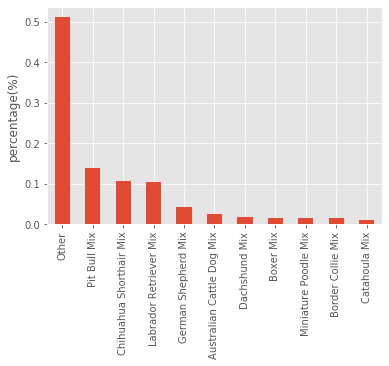

In [136]:
# Dog breed distribution
plt.style.use('ggplot')

Dog_breed = Dog.breed.value_counts().to_frame()
Dog_breed['percent'] = Dog_breed['breed']/Dog_breed['breed'].sum()
ax=Dog_breed['percent'].plot(kind='bar')
ax.set_ylabel('percentage(%)')

We can predict the top 10 dog breed in the future. 50% are other breed. 

In [143]:
# top 10 Dog color
n = 10
dog_color_10=Dog.color.value_counts()[:n].index.tolist()
Dog.loc[~Dog.color.isin(dog_color_10),'color'] = 'Other'

Text(0, 0.5, 'percentage(%)')

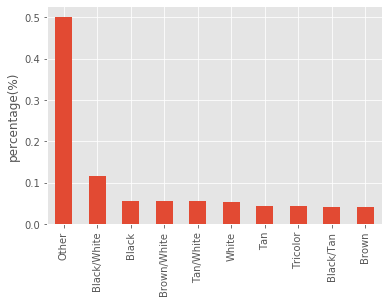

In [146]:
# Dog color distribution
plt.style.use('ggplot')

Dog_color = Dog.color.value_counts().to_frame()
Dog_color['percent'] = Dog_color['color']/Dog_color['color'].sum()
ax=Dog_color['percent'].plot(kind='bar')
ax.set_ylabel('percentage(%)')

We can predict the top 10 dog color in the future. 50% are other breed.

In [148]:
# top 10 Cat breed
n = 10
cat_breed_10=Cat.breed.value_counts()[:n].index.tolist()
Cat.loc[~Cat.breed.isin(cat_breed_10),'breed'] = 'Other'

Text(0, 0.5, 'percentage(%)')

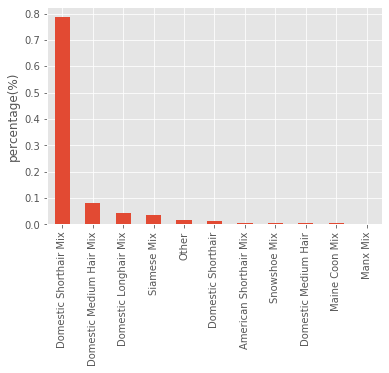

In [149]:
# Cat breed distribution
plt.style.use('ggplot')

cat_breed = Cat.breed.value_counts().to_frame()
cat_breed['percent'] = cat_breed['breed']/cat_breed['breed'].sum()
ax=cat_breed['percent'].plot(kind='bar')
ax.set_ylabel('percentage(%)')

90% cat are domestic mix. 

In [151]:
# top 10 Cat color
n = 10
cat_color_10=Cat.color.value_counts()[:n].index.tolist()
Cat.loc[~Cat.color.isin(cat_color_10),'color'] = 'Other'

Text(0, 0.5, 'percentage(%)')

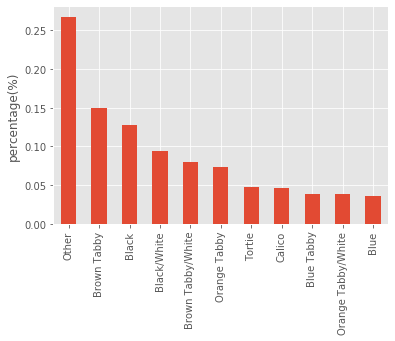

In [152]:
# Cat breed distribution
plt.style.use('ggplot')

cat_color = Cat.color.value_counts().to_frame()
cat_color['percent'] = cat_color['color']/cat_color['color'].sum()
ax=cat_color['percent'].plot(kind='bar')
ax.set_ylabel('percentage(%)')

We can predict the top 10 cat color in the future.

In [155]:
# top 10 bird breed
n = 10
Bird_breed_10=Bird.breed.value_counts()[:n].index.tolist()
Bird.loc[~Bird.breed.isin(Bird_breed_10),'breed'] = 'Other'

Text(0, 0.5, 'percentage(%)')

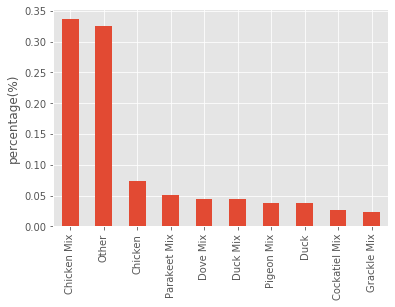

In [157]:
# Bird breed distribution
plt.style.use('ggplot')

Bird_breed = Bird.breed.value_counts().to_frame()
Bird_breed['percent'] = Bird_breed['breed']/Bird_breed['breed'].sum()
ax=Bird_breed['percent'].plot(kind='bar')
ax.set_ylabel('percentage(%)')

Chicken mix arethe major bird type. 

In [159]:
# top 10 bird color
n = 10
Bird_color_10=Bird.color.value_counts()[:n].index.tolist()
Bird.loc[~Bird.color.isin(Bird_color_10),'color'] = 'Other'

Text(0, 0.5, 'percentage(%)')

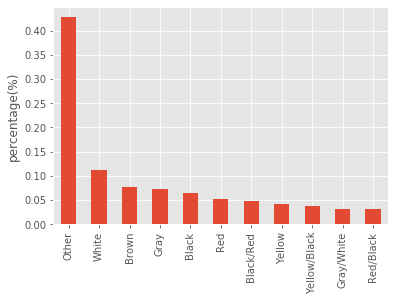

In [160]:
# Bird breed distribution
plt.style.use('ggplot')

Bird_color = Bird.color.value_counts().to_frame()
Bird_color['percent'] = Bird_color['color']/Bird_color['color'].sum()
ax=Bird_color['percent'].plot(kind='bar')
ax.set_ylabel('percentage(%)')

In [162]:
# top 10 other animal breed
n = 10
Other_breed_10=Other.breed.value_counts()[:n].index.tolist()
Other.loc[~Other.breed.isin(Other_breed_10),'breed'] = 'Other'

Text(0, 0.5, 'percentage(%)')

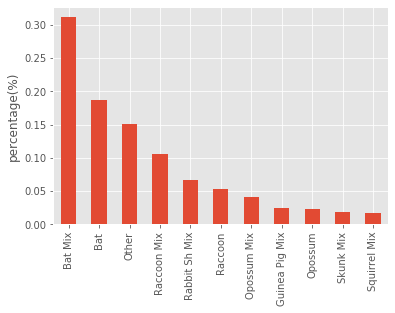

In [163]:
# Bird breed distribution
plt.style.use('ggplot')

Other_breed = Other.breed.value_counts().to_frame()
Other_breed['percent'] = Other_breed['breed']/Other_breed['breed'].sum()
ax=Other_breed['percent'].plot(kind='bar')
ax.set_ylabel('percentage(%)')

Bat is the majot type of other animals

In [166]:
# top 10 other animal color
n = 10
Other_color_10=Other.color.value_counts()[:n].index.tolist()
Other.loc[~Other.color.isin(Other_color_10),'color'] = 'Other'

Text(0, 0.5, 'percentage(%)')

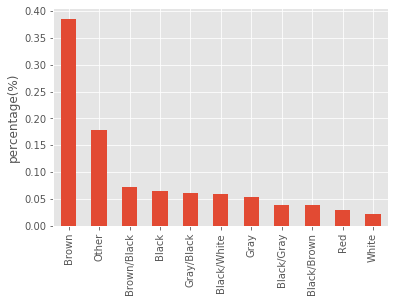

In [167]:
# Bird breed distribution
plt.style.use('ggplot')

Other_color = Other.color.value_counts().to_frame()
Other_color['percent'] = Other_color['color']/Other_color['color'].sum()
ax=Other_color['percent'].plot(kind='bar')
ax.set_ylabel('percentage(%)')

Brown is the most common color among other animals. 